## 2 . Compare the network with state-of-the-art networks - Resnet

### Mount the google drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the data

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [12]:
img_size = (224, 224)
batch_size = 32

train_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/train'
validation_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)


Found 5468 images belonging to 5 classes.
Found 1823 images belonging to 5 classes.


### Train the model

In [13]:
# Load pre-trained ResNet50 model without the top layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(5, activation='softmax')(x)  # 5 classes

# Create the model
model_resnet = Model(inputs=base_model_resnet.input, outputs=x)

# Freeze the base model layers
for layer in base_model_resnet.layers:
    layer.trainable = False

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.3207 - loss: 1.5107 - val_accuracy: 0.4833 - val_loss: 1.3342
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.4831 - loss: 1.3323 - val_accuracy: 0.4833 - val_loss: 1.3308
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.4845 - loss: 1.3248 - val_accuracy: 0.4833 - val_loss: 1.3284
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.4765 - loss: 1.3364 - val_accuracy: 0.4833 - val_loss: 1.3224
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.4709 - loss: 1.3403 - val_accuracy: 0.4833 - val_loss: 1.3198
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.4753 - loss: 1.3302 - val_accuracy: 0.4833 - val_loss: 1.3179
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.4765 - loss: 1.3143 - val_accuracy: 0.4833 - val_loss: 1.3118
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.4821 - loss: 1.3132 - val_accu

### Save the model

In [14]:
# Path to save the model
save_path = '/content/drive/My Drive/models/model_resnet.h5'

# Save the model
model_resnet.save(save_path)

# Confirm the model has been saved
print("Model saved successfully!")


Model saved successfully!


### Plot the traning and validation loss

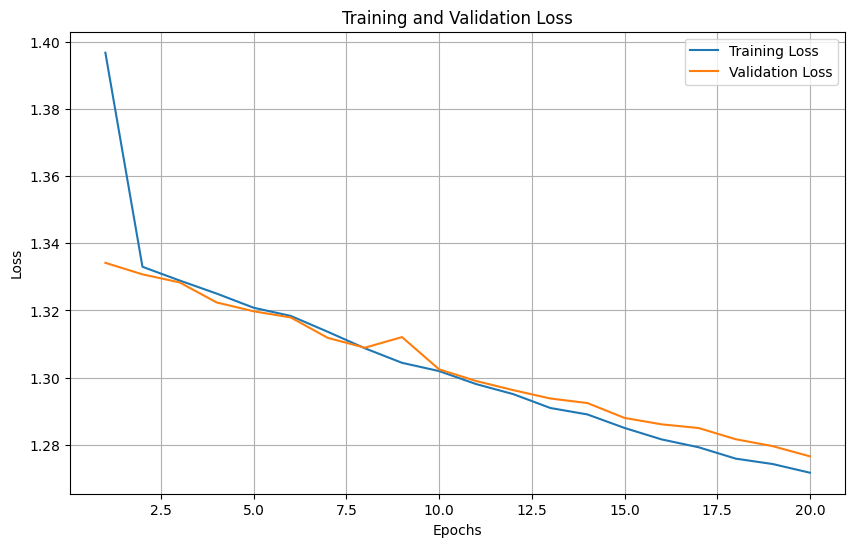

In [16]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

# Extract the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Compute the test accuracy

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/test'

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Parameters

img_size = (224, 224)  # Replace with your model's expected input size
batch_size = 32  # Adjust batch size if needed

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False  # No shuffling to preserve order
)


Found 1823 images belonging to 5 classes.


In [24]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np



# Get predictions on the test data
test_generator.reset()  # Ensure the generator starts from the first batch
predictions = model_resnet.predict(test_generator, verbose=1)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_classes = test_generator.classes

# Compute the test accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step
Test Accuracy: 48.55%
